## Дополнительное задание для работы с курсовым проектом:

(Необязательно выполнять, но очень желательно)

Скачать данные из соревнования, пока можете работать только с train.csv. Считать их.

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('train.csv.zip',compression="zip")

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры

### Разведочный анализ данных

In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
df = reduce_mem_usage(df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [5]:
df.dtypes

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

In [6]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000
1,3013,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875
2,8215,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750
3,2352,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750


1. Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения). Сделать выводы об адекватности этих статистик.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315777,21.058731,1.136859,41.774879,52.513309,65.900627,6.410652e+02
LifeSquare,7887.0,37.199646,86.241211,0.370619,22.769833,32.781261,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218670e-01


2. Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются. Сделать выводы по каждому признаку.


Признак Id
Количество уникальных значений 10000



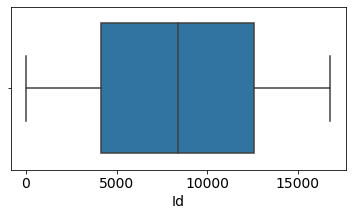


Признак DistrictId
Количество уникальных значений 205



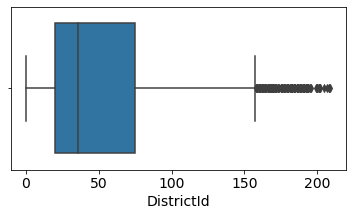


Признак Rooms
Количество уникальных значений 9



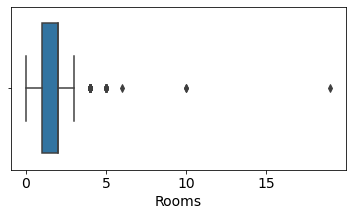

Уникальный элемент 0.0 - найдено 8
Уникальный элемент 1.0 - найдено 3705
Уникальный элемент 2.0 - найдено 3880
Уникальный элемент 3.0 - найдено 2235
Уникальный элемент 4.0 - найдено 150
Уникальный элемент 5.0 - найдено 18
Уникальный элемент 6.0 - найдено 1
Уникальный элемент 10.0 - найдено 2
Уникальный элемент 19.0 - найдено 1

Признак Square
Количество уникальных значений 10000



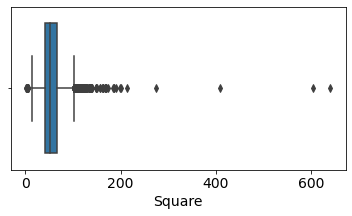


Признак LifeSquare
Количество уникальных значений 10000



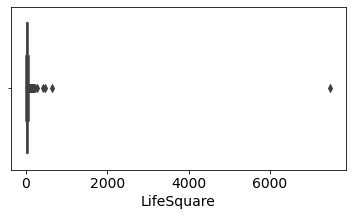


Признак KitchenSquare
Количество уникальных значений 58



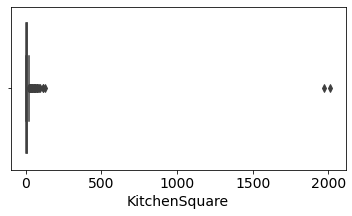

Уникальный элемент 0.0 - найдено 697
Уникальный элемент 1.0 - найдено 2460
Уникальный элемент 2.0 - найдено 4
Уникальный элемент 3.0 - найдено 22
Уникальный элемент 4.0 - найдено 39
Уникальный элемент 5.0 - найдено 1169
Уникальный элемент 6.0 - найдено 1038
Уникальный элемент 7.0 - найдено 609
Уникальный элемент 8.0 - найдено 1306
Уникальный элемент 9.0 - найдено 843
Уникальный элемент 10.0 - найдено 1075
Уникальный элемент 11.0 - найдено 233
Уникальный элемент 12.0 - найдено 249
Уникальный элемент 13.0 - найдено 67
Уникальный элемент 14.0 - найдено 51
Уникальный элемент 15.0 - найдено 31
Уникальный элемент 16.0 - найдено 16
Уникальный элемент 17.0 - найдено 12
Уникальный элемент 18.0 - найдено 6
Уникальный элемент 19.0 - найдено 11
Уникальный элемент 20.0 - найдено 14
Уникальный элемент 21.0 - найдено 1
Уникальный элемент 22.0 - найдено 3
Уникальный элемент 23.0 - найдено 1
Уникальный элемент 25.0 - найдено 2
Уникальный элемент 26.0 - найдено 1
Уникальный элемент 27.0 - найдено 1
Уник

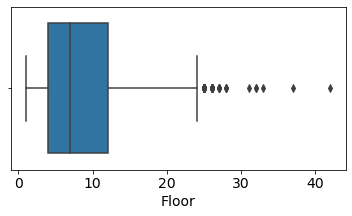

Уникальный элемент 1 - найдено 235
Уникальный элемент 2 - найдено 588
Уникальный элемент 3 - найдено 872
Уникальный элемент 4 - найдено 949
Уникальный элемент 5 - найдено 876
Уникальный элемент 6 - найдено 802
Уникальный элемент 7 - найдено 759
Уникальный элемент 8 - найдено 643
Уникальный элемент 9 - найдено 604
Уникальный элемент 10 - найдено 553
Уникальный элемент 11 - найдено 457
Уникальный элемент 12 - найдено 438
Уникальный элемент 13 - найдено 398
Уникальный элемент 14 - найдено 362
Уникальный элемент 15 - найдено 287
Уникальный элемент 16 - найдено 290
Уникальный элемент 17 - найдено 256
Уникальный элемент 18 - найдено 185
Уникальный элемент 19 - найдено 121
Уникальный элемент 20 - найдено 68
Уникальный элемент 21 - найдено 59
Уникальный элемент 22 - найдено 54
Уникальный элемент 23 - найдено 25
Уникальный элемент 24 - найдено 53
Уникальный элемент 25 - найдено 34
Уникальный элемент 26 - найдено 18
Уникальный элемент 27 - найдено 5
Уникальный элемент 28 - найдено 3
Уникальный э

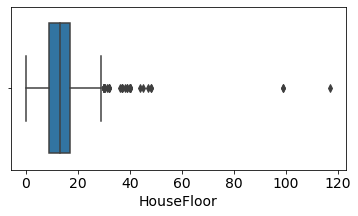

Уникальный элемент 0.0 - найдено 269
Уникальный элемент 1.0 - найдено 497
Уникальный элемент 2.0 - найдено 48
Уникальный элемент 3.0 - найдено 127
Уникальный элемент 4.0 - найдено 134
Уникальный элемент 5.0 - найдено 1031
Уникальный элемент 6.0 - найдено 58
Уникальный элемент 7.0 - найдено 59
Уникальный элемент 8.0 - найдено 141
Уникальный элемент 9.0 - найдено 1389
Уникальный элемент 10.0 - найдено 135
Уникальный элемент 11.0 - найдено 28
Уникальный элемент 12.0 - найдено 1074
Уникальный элемент 13.0 - найдено 27
Уникальный элемент 14.0 - найдено 625
Уникальный элемент 15.0 - найдено 123
Уникальный элемент 16.0 - найдено 576
Уникальный элемент 17.0 - найдено 2331
Уникальный элемент 18.0 - найдено 89
Уникальный элемент 19.0 - найдено 108
Уникальный элемент 20.0 - найдено 105
Уникальный элемент 21.0 - найдено 33
Уникальный элемент 22.0 - найдено 343
Уникальный элемент 23.0 - найдено 40
Уникальный элемент 24.0 - найдено 176
Уникальный элемент 25.0 - найдено 374
Уникальный элемент 26.0 - 

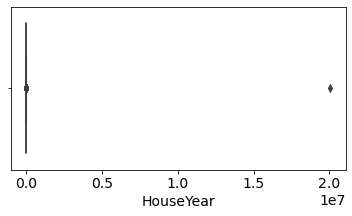

Уникальный элемент 1910 - найдено 1
Уникальный элемент 1912 - найдено 2
Уникальный элемент 1914 - найдено 1
Уникальный элемент 1916 - найдено 1
Уникальный элемент 1917 - найдено 3
Уникальный элемент 1918 - найдено 5
Уникальный элемент 1919 - найдено 3
Уникальный элемент 1928 - найдено 1
Уникальный элемент 1929 - найдено 2
Уникальный элемент 1930 - найдено 3
Уникальный элемент 1931 - найдено 7
Уникальный элемент 1932 - найдено 2
Уникальный элемент 1933 - найдено 5
Уникальный элемент 1934 - найдено 4
Уникальный элемент 1935 - найдено 7
Уникальный элемент 1936 - найдено 3
Уникальный элемент 1937 - найдено 5
Уникальный элемент 1938 - найдено 4
Уникальный элемент 1939 - найдено 6
Уникальный элемент 1940 - найдено 4
Уникальный элемент 1941 - найдено 2
Уникальный элемент 1942 - найдено 3
Уникальный элемент 1947 - найдено 1
Уникальный элемент 1948 - найдено 2
Уникальный элемент 1950 - найдено 7
Уникальный элемент 1951 - найдено 4
Уникальный элемент 1952 - найдено 10
Уникальный элемент 1953 - н

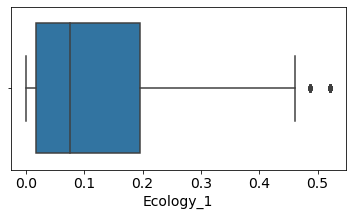

Уникальный элемент 0.0 - найдено 537
Уникальный элемент 1.8e-09 - найдено 10
Уникальный элемент 6.99893e-05 - найдено 83
Уникальный элемент 7.81528e-05 - найдено 245
Уникальный элемент 0.0001696759999999 - найдено 70
Уникальный элемент 0.0006991189999999 - найдено 37
Уникальный элемент 0.000991363 - найдено 39
Уникальный элемент 0.000995363 - найдено 71
Уникальный элемент 0.002211665 - найдено 54
Уникальный элемент 0.004949358 - найдено 11
Уникальный элемент 0.005767451 - найдено 56
Уникальный элемент 0.006076152 - найдено 99
Уникальный элемент 0.007122317 - найдено 587
Уникальный элемент 0.007658515 - найдено 49
Уникальный элемент 0.0077202819999999 - найдено 64
Уникальный элемент 0.01131981 - найдено 3
Уникальный элемент 0.011654127 - найдено 141
Уникальный элемент 0.012338886 - найдено 76
Уникальный элемент 0.012521634 - найдено 1
Уникальный элемент 0.01405792 - найдено 11
Уникальный элемент 0.014072961 - найдено 55
Уникальный элемент 0.014333947 - найдено 1
Уникальный элемент 0.014

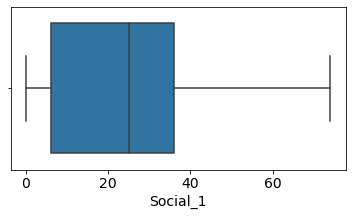

Уникальный элемент 0 - найдено 201
Уникальный элемент 1 - найдено 654
Уникальный элемент 2 - найдено 688
Уникальный элемент 3 - найдено 9
Уникальный элемент 4 - найдено 141
Уникальный элемент 5 - найдено 528
Уникальный элемент 6 - найдено 377
Уникальный элемент 7 - найдено 15
Уникальный элемент 8 - найдено 62
Уникальный элемент 9 - найдено 213
Уникальный элемент 10 - найдено 24
Уникальный элемент 11 - найдено 138
Уникальный элемент 12 - найдено 18
Уникальный элемент 13 - найдено 22
Уникальный элемент 14 - найдено 46
Уникальный элемент 15 - найдено 51
Уникальный элемент 16 - найдено 123
Уникальный элемент 17 - найдено 96
Уникальный элемент 18 - найдено 92
Уникальный элемент 19 - найдено 118
Уникальный элемент 20 - найдено 50
Уникальный элемент 21 - найдено 207
Уникальный элемент 22 - найдено 367
Уникальный элемент 23 - найдено 434
Уникальный элемент 24 - найдено 205
Уникальный элемент 25 - найдено 557
Уникальный элемент 26 - найдено 127
Уникальный элемент 27 - найдено 151
Уникальный эле

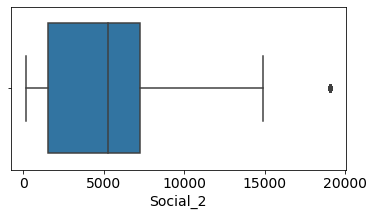

Уникальный элемент 168 - найдено 190
Уникальный элемент 186 - найдено 11
Уникальный элемент 264 - найдено 587
Уникальный элемент 290 - найдено 11
Уникальный элемент 388 - найдено 56
Уникальный элемент 469 - найдено 142
Уникальный элемент 475 - найдено 55
Уникальный элемент 507 - найдено 1
Уникальный элемент 528 - найдено 1
Уникальный элемент 568 - найдено 3
Уникальный элемент 629 - найдено 486
Уникальный элемент 662 - найдено 2
Уникальный элемент 760 - найдено 7
Уникальный элемент 915 - найдено 141
Уникальный элемент 1135 - найдено 6
Уникальный элемент 1227 - найдено 11
Уникальный элемент 1318 - найдено 16
Уникальный элемент 1423 - найдено 3
Уникальный элемент 1437 - найдено 346
Уникальный элемент 1497 - найдено 22
Уникальный элемент 1564 - найдено 511
Уникальный элемент 1660 - найдено 15
Уникальный элемент 1768 - найдено 14
Уникальный элемент 1892 - найдено 172
Уникальный элемент 1952 - найдено 27
Уникальный элемент 1986 - найдено 25
Уникальный элемент 2270 - найдено 18
Уникальный эле

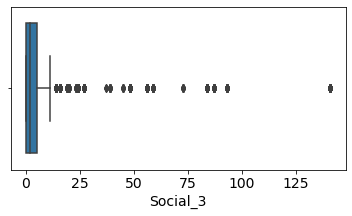

Уникальный элемент 0 - найдено 2997
Уникальный элемент 1 - найдено 1861
Уникальный элемент 2 - найдено 635
Уникальный элемент 3 - найдено 1136
Уникальный элемент 4 - найдено 835
Уникальный элемент 5 - найдено 391
Уникальный элемент 6 - найдено 423
Уникальный элемент 7 - найдено 184
Уникальный элемент 8 - найдено 170
Уникальный элемент 9 - найдено 192
Уникальный элемент 10 - найдено 142
Уникальный элемент 11 - найдено 172
Уникальный элемент 14 - найдено 97
Уникальный элемент 16 - найдено 101
Уникальный элемент 19 - найдено 22
Уникальный элемент 20 - найдено 19
Уникальный элемент 23 - найдено 18
Уникальный элемент 24 - найдено 37
Уникальный элемент 27 - найдено 59
Уникальный элемент 37 - найдено 3
Уникальный элемент 39 - найдено 15
Уникальный элемент 45 - найдено 9
Уникальный элемент 48 - найдено 58
Уникальный элемент 56 - найдено 49
Уникальный элемент 59 - найдено 25
Уникальный элемент 73 - найдено 10
Уникальный элемент 84 - найдено 43
Уникальный элемент 87 - найдено 27
Уникальный элеме

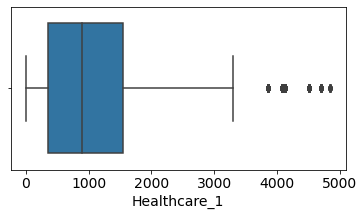


Признак Helthcare_2
Количество уникальных значений 7



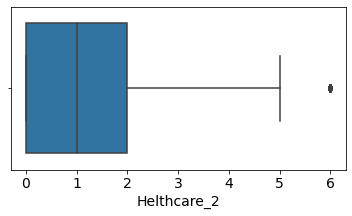

Уникальный элемент 0 - найдено 4214
Уникальный элемент 1 - найдено 2183
Уникальный элемент 2 - найдено 1158
Уникальный элемент 3 - найдено 1670
Уникальный элемент 4 - найдено 288
Уникальный элемент 5 - найдено 388
Уникальный элемент 6 - найдено 99

Признак Shops_1
Количество уникальных значений 16



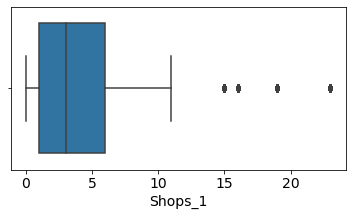

Уникальный элемент 0 - найдено 2316
Уникальный элемент 1 - найдено 1325
Уникальный элемент 2 - найдено 964
Уникальный элемент 3 - найдено 711
Уникальный элемент 4 - найдено 841
Уникальный элемент 5 - найдено 1324
Уникальный элемент 6 - найдено 487
Уникальный элемент 7 - найдено 294
Уникальный элемент 8 - найдено 253
Уникальный элемент 9 - найдено 316
Уникальный элемент 10 - найдено 215
Уникальный элемент 11 - найдено 401
Уникальный элемент 15 - найдено 176
Уникальный элемент 16 - найдено 83
Уникальный элемент 19 - найдено 49
Уникальный элемент 23 - найдено 245

Признак Shops_2
Количество уникальных значений 2

Уникальный элемент A - найдено 825
Уникальный элемент B - найдено 9175

Признак Price
Количество уникальных значений 10000



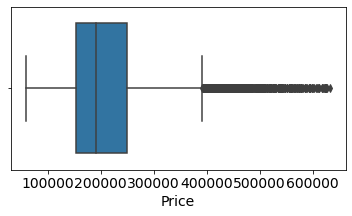

In [60]:
df_num_features = df.select_dtypes(include=['number'])
for el in df:
    print(f"\nПризнак {el}")
    print(f"Количество уникальных значений {len(np.unique(df[el]))}\n")
    if el in df_num_features:
        plt.figure(figsize=(6, 3))
        sns.boxplot(df[el], whis=1.5)
        plt.xlabel(el)
        plt.show()
    if len(np.unique(df[el])) < 150:
        unpdf = np.unique(df[el], return_counts = True)
        for el2 in unpdf[0]:
            print(f"Уникальный элемент {unpdf[0][list(unpdf[0]).index(el2)]} - найдено {unpdf[1][list(unpdf[0]).index(el2)]}")
            #if unpdf[1][list(unpdf[0]).index(el2)] < 3:
            #    print(df[df[el] == unpdf[0][list(unpdf[0]).index(el2)]].transpose())
    

3. Построить график распределения целевой переменной. Сделать выводы.

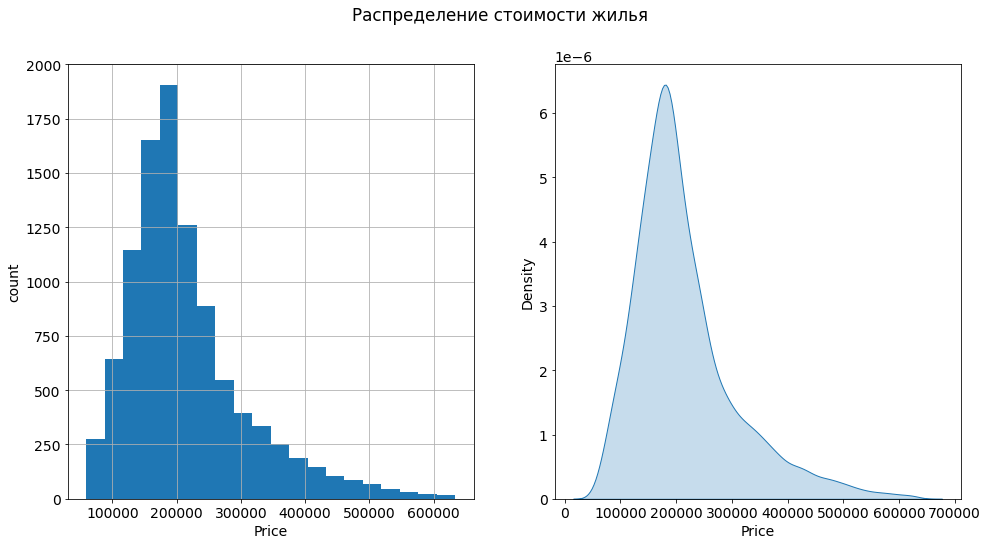

In [9]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Распределение стоимости жилья')
plt.show()

4. Построить гистограммы для наиболее проблемных признаков. Сделайте по ним выводы.

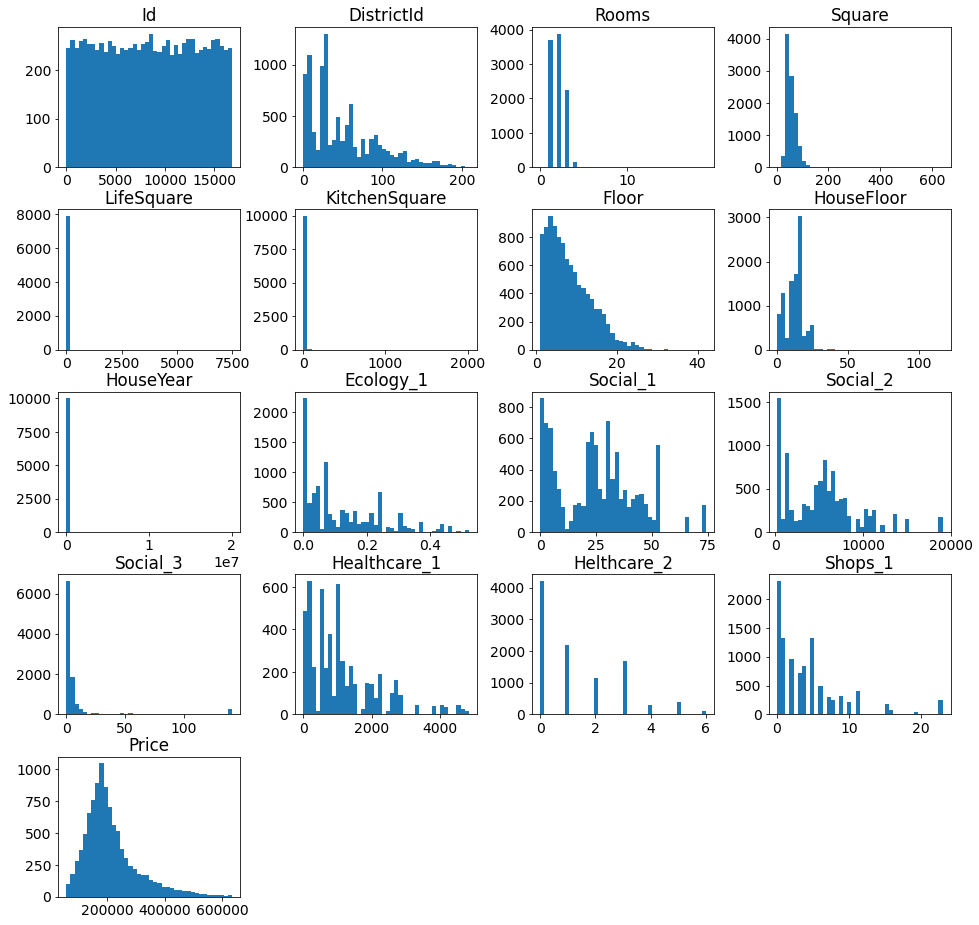

In [10]:
df.hist(figsize=(16,16), bins=40, grid=False);

5. Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

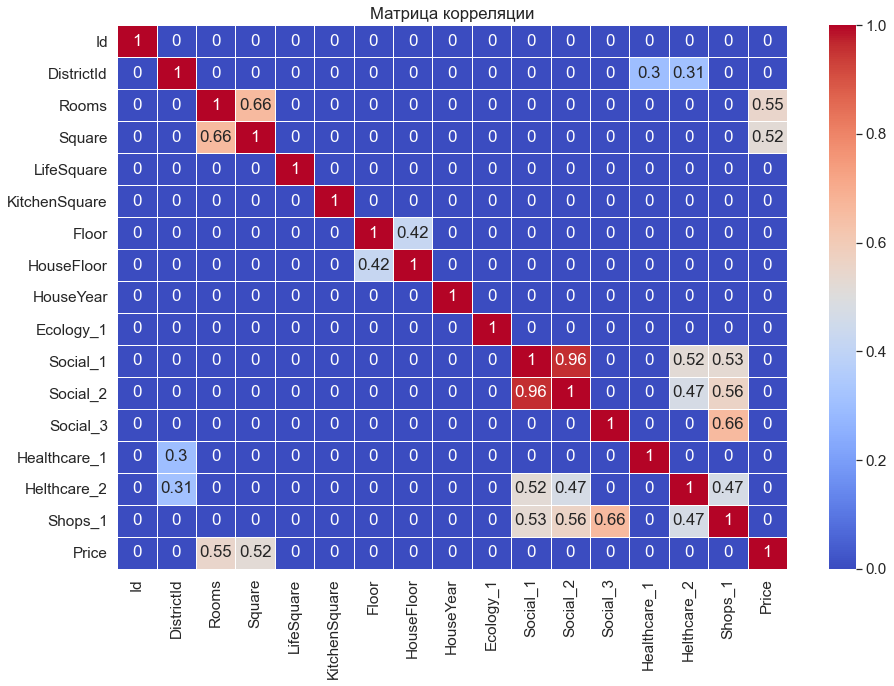

In [52]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляции')
plt.show()

### Предобработка данных

1 Проверить что этаж не больше количства этажей в здании
2 Ввести параметр соотношения площади кухни к общей и жилой, исправить неправильные
2 

1. Заполните пропущенные значения в датасете медианами или модами (или можете взять более сложные подходы (группировки, заполнение моделью)).

2. Переведите строковый признак в числовое представление.

3. Погенерируйте новые признаки.